In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [3]:
df = pd.read_excel(r'工厂类冷冻站运行与电量数据.xlsx')
# loading the updated columns name from an offline file
col = pd.read_excel('col_name.xlsx',skiprows=1)
df.columns = list(col['col_name_updated'])

In [5]:
df = df.set_index('time')
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month
df['weekday_name']= df.index.day_name()
df['weekday'] = df.index.weekday
df['Is_weekend'] = df['weekday'].isin((5,6))

In [7]:
columns_chiller2 = ['Temp', 'humid', '2#Chiller','2#Chiller_freeze_in_temp',
       '2#Chiller_freeze_out_temp', '2#Chiller_freeze_Flow',
       '2#Chiller_cooling_in_temp', '2#Chiller_cooling_out_temp',
       '2#Chiller_cooling_Flow', '2#Chiller_power', '2-CH-UA(V)', '2-CH-IA(A)',
       '2-CH-F(HZ)','2#chiller_cooling_capacity','Hour', 'Day',
       'Month',  'weekday', 'Is_weekend']
columns_chiller3 = ['Temp', 'humid', '3#Chiller','3#Chiller_freeze_in_temp',
       '3#Chiller_freeze_out_temp', '3#Chiller_freeze_Flow',
       '3#Chiller_cooling_in_temp', '3#Chiller_cooling_out_temp',
       '3#Chiller_cooling_Flow', '3#Chiller_power', '3-CH-UA(V)', '3-CH-IA(A)',
       '3-CH-F(HZ)','3#chiller_cooling_capacity','Hour', 'Day',
       'Month',  'weekday', 'Is_weekend']

In [8]:
chiller2 = df[columns_chiller2].copy()
chiller2['2#Chiller_power'] = abs(chiller2['2#Chiller_power'])
chiller3 = df[columns_chiller3].copy()
chiller3['3#Chiller_power'] = abs(chiller3['3#Chiller_power'])

In [9]:
# explict which variable is used to construct X
#  'Is_weekend' need to deploy a conversion function
indep2 = ['Temp', 'humid',  '2#Chiller', '2#Chiller_freeze_in_temp',
       '2#Chiller_freeze_out_temp', '2#Chiller_freeze_Flow',
       '2#Chiller_cooling_in_temp', '2#Chiller_cooling_out_temp',
       '2#Chiller_cooling_Flow', '2-CH-UA(V)', '2-CH-IA(A)',
       '2-CH-F(HZ)','2#chiller_cooling_capacity','Hour', 'Day',
       'Month',  'weekday']

indep3 = ['Temp', 'humid',  '3#Chiller', '3#Chiller_freeze_in_temp',
       '3#Chiller_freeze_out_temp', '3#Chiller_freeze_Flow',
       '3#Chiller_cooling_in_temp', '3#Chiller_cooling_out_temp',
       '3#Chiller_cooling_Flow', '3-CH-UA(V)', '3-CH-IA(A)',
       '3-CH-F(HZ)','3#chiller_cooling_capacity','Hour', 'Day',
       'Month',  'weekday']

## create model for chiller2 and chiller3

In [11]:
def get_stats(df, x, y ):
    x = df[x]
    y = df[y]
    results = sm.OLS(y, x).fit()
    print(results.summary())
    
get_stats(df = chiller2, x = indep2, y = '2#Chiller_power' )

                                 OLS Regression Results                                
Dep. Variable:        2#Chiller_power   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          2.813e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        16:29:49   Log-Likelihood:                         -68113.
No. Observations:               14880   AIC:                                  1.363e+05
Df Residuals:                   14863   BIC:                                  1.364e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [12]:
indep2.remove("humid")
get_stats(df = chiller2, x = indep2, y = '2#Chiller_power' )

                                 OLS Regression Results                                
Dep. Variable:        2#Chiller_power   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          2.989e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        16:36:06   Log-Likelihood:                         -68113.
No. Observations:               14880   AIC:                                  1.363e+05
Df Residuals:                   14864   BIC:                                  1.364e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [13]:
indep2.remove("2-CH-F(HZ)")
get_stats(df = chiller2, x = indep2, y = '2#Chiller_power' )

                                 OLS Regression Results                                
Dep. Variable:        2#Chiller_power   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          3.188e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        16:37:23   Log-Likelihood:                         -68113.
No. Observations:               14880   AIC:                                  1.363e+05
Df Residuals:                   14865   BIC:                                  1.364e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [14]:
indep2.remove("Hour")
get_stats(df = chiller2, x = indep2, y = '2#Chiller_power' )

                                 OLS Regression Results                                
Dep. Variable:        2#Chiller_power   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          3.416e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        16:37:58   Log-Likelihood:                         -68114.
No. Observations:               14880   AIC:                                  1.363e+05
Df Residuals:                   14866   BIC:                                  1.364e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [20]:
def get_VIF(x:list, df:pd.DataFrame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = x
    vif_data["VIF"] = [variance_inflation_factor(df[x].values, i)
                          for i in range(len(x))]
    print(vif_data.sort_values(by='VIF',ascending=False))
    
get_VIF(indep2, chiller2)

                       feature         VIF
3    2#Chiller_freeze_out_temp  322.961349
2     2#Chiller_freeze_in_temp  282.234427
6   2#Chiller_cooling_out_temp  257.506295
5    2#Chiller_cooling_in_temp  174.066718
8                   2-CH-UA(V)  124.806825
0                         Temp   75.146785
12                       Month   44.910878
10  2#chiller_cooling_capacity    8.857105
4        2#Chiller_freeze_Flow    8.263114
1                    2#Chiller    7.630338
7       2#Chiller_cooling_Flow    6.757697
11                         Day    6.065597
13                     weekday    3.374018
9                   2-CH-IA(A)    2.053267


In [21]:
indep2.remove("2#Chiller_freeze_out_temp")
get_stats(df = chiller2, x = indep2, y = '2#Chiller_power' )
get_VIF(indep2, chiller2)

                                 OLS Regression Results                                
Dep. Variable:        2#Chiller_power   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                          3.593e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        16:50:49   Log-Likelihood:                         -68283.
No. Observations:               14880   AIC:                                  1.366e+05
Df Residuals:                   14867   BIC:                                  1.367e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [22]:
indep2.remove("2#Chiller_cooling_out_temp")
get_stats(df = chiller2, x = indep2, y = '2#Chiller_power' )
get_VIF(indep2, chiller2)

                                 OLS Regression Results                                
Dep. Variable:        2#Chiller_power   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                          3.861e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        16:51:19   Log-Likelihood:                         -68342.
No. Observations:               14880   AIC:                                  1.367e+05
Df Residuals:                   14868   BIC:                                  1.368e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [23]:
indep2.remove("2#Chiller_cooling_in_temp")
get_stats(df = chiller2, x = indep2, y = '2#Chiller_power' )
get_VIF(indep2, chiller2)

                                 OLS Regression Results                                
Dep. Variable:        2#Chiller_power   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          3.969e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        16:52:04   Log-Likelihood:                         -68771.
No. Observations:               14880   AIC:                                  1.376e+05
Df Residuals:                   14869   BIC:                                  1.376e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [24]:
indep2.remove("2-CH-UA(V)")
get_stats(df = chiller2, x = indep2, y = '2#Chiller_power' )
get_VIF(indep2, chiller2)

                                 OLS Regression Results                                
Dep. Variable:        2#Chiller_power   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          4.358e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        16:52:34   Log-Likelihood:                         -68785.
No. Observations:               14880   AIC:                                  1.376e+05
Df Residuals:                   14870   BIC:                                  1.377e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [25]:
indep2.remove("Temp")
get_stats(df = chiller2, x = indep2, y = '2#Chiller_power' )
get_VIF(indep2, chiller2)

                                 OLS Regression Results                                
Dep. Variable:        2#Chiller_power   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          4.809e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        16:55:25   Log-Likelihood:                         -68834.
No. Observations:               14880   AIC:                                  1.377e+05
Df Residuals:                   14871   BIC:                                  1.378e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [26]:
indep2.remove("Month")
get_stats(df = chiller2, x = indep2, y = '2#Chiller_power' )
get_VIF(indep2, chiller2)

                                 OLS Regression Results                                
Dep. Variable:        2#Chiller_power   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          5.410e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        16:55:57   Log-Likelihood:                         -68835.
No. Observations:               14880   AIC:                                  1.377e+05
Df Residuals:                   14872   BIC:                                  1.377e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [27]:
# a point that can stop
indep2

['2#Chiller',
 '2#Chiller_freeze_in_temp',
 '2#Chiller_freeze_Flow',
 '2#Chiller_cooling_Flow',
 '2-CH-IA(A)',
 '2#chiller_cooling_capacity',
 'Day',
 'weekday']

In [28]:
model2_stop = indep2.copy()

In [29]:
indep2.remove("2#Chiller_freeze_Flow")
get_stats(df = chiller2, x = indep2, y = '2#Chiller_power' )
get_VIF(indep2, chiller2)

                                 OLS Regression Results                                
Dep. Variable:        2#Chiller_power   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                          5.909e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:02:34   Log-Likelihood:                         -69161.
No. Observations:               14880   AIC:                                  1.383e+05
Df Residuals:                   14873   BIC:                                  1.384e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [30]:
indep2.remove("2#Chiller_cooling_Flow")
get_stats(df = chiller2, x = indep2, y = '2#Chiller_power' )
get_VIF(indep2, chiller2)

                                 OLS Regression Results                                
Dep. Variable:        2#Chiller_power   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                          6.894e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:03:36   Log-Likelihood:                         -69162.
No. Observations:               14880   AIC:                                  1.383e+05
Df Residuals:                   14874   BIC:                                  1.384e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [31]:
indep2.remove("2#chiller_cooling_capacity")
get_stats(df = chiller2, x = indep2, y = '2#Chiller_power' )
get_VIF(indep2, chiller2)

                                 OLS Regression Results                                
Dep. Variable:        2#Chiller_power   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                          4.464e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:05:22   Log-Likelihood:                         -73535.
No. Observations:               14880   AIC:                                  1.471e+05
Df Residuals:                   14875   BIC:                                  1.471e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [32]:
indep2.remove("2#Chiller_freeze_in_temp")
get_stats(df = chiller2, x = indep2, y = '2#Chiller_power' )
get_VIF(indep2, chiller2)

                                 OLS Regression Results                                
Dep. Variable:        2#Chiller_power   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                          5.557e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:11:39   Log-Likelihood:                         -73564.
No. Observations:               14880   AIC:                                  1.471e+05
Df Residuals:                   14876   BIC:                                  1.472e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
def contributions(df:pd.DataFrame, x_list:list, y:str ):
    x = df[x_list]
    y = df[y]
    results = sm.OLS(y, x).fit()
    results.params
    
    # reg is a dataframe that contains the multiplied data of coef * raw     
    reg = pd.DataFrame()
    
    # use each var's params to multiply itself    
    for i in range(len(x_list)):
        reg[x_list[i]+'_pred'] = df[x_list[i]] * results.params[i]
        
    # this line is to sum up all columns to a total number as prediction (horizontally)
    reg['Pred'] = reg.sum(axis=1)
    
    # this line to to sum up all row to calculate a column-sum (vertically)  
    reg.sum(axis=0)
    
    # contri is a pd series that aims to record the contribution data that calcated from reg
    # there's a future warning here when not explict 'float64'     
    contri = pd.Series(dtype='float64')
    
    contri = abs(reg.sum(axis=0)/reg.sum(axis=0)[-1]).sort_values(ascending=False)
    
    # the second is the largest individual. this is to calc the relative importance
    contri[1:]/contri[1]
    
    # accu is a dataframe that combines reg and y, in order to test the fit and accuracy     
    accu = pd.concat([reg.copy(), y ], axis=1)
    
    return contri[1:]/contri[1], accu

In [34]:
test2 = contributions(df = chiller2, x_list = indep2, y = '2#Chiller_power')
test2[0]

2#Chiller_pred     1.000000
2-CH-IA(A)_pred    0.071416
weekday_pred       0.040446
Day_pred           0.016438
dtype: float64

In [35]:
test2[1]

,2#Chiller_pred,2-CH-IA(A)_pred,Day_pred,weekday_pred,Pred,2#Chiller_power
time,,,,,,
2019-05-11 00:00:13,0.0,0.0,0.780354,-4.561898,-3.781545,0.0
2019-05-11 00:15:13,0.0,0.0,0.780354,-4.561898,-3.781545,0.0
2019-05-11 00:30:13,0.0,0.0,0.780354,-4.561898,-3.781545,0.0
2019-05-11 00:45:13,0.0,0.0,0.780354,-4.561898,-3.781545,0.0
2019-05-11 01:00:13,0.0,0.0,0.780354,-4.561898,-3.781545,0.0
...,...,...,...,...,...,...
2019-10-12 22:45:13,0.0,0.0,0.851295,-4.561898,-3.710603,0.0
2019-10-12 23:00:13,0.0,0.0,0.851295,-4.561898,-3.710603,0.0
2019-10-12 23:15:13,0.0,0.0,0.851295,-4.561898,-3.710603,0.0


In [36]:
test2a = contributions(df = chiller2, x_list = model2_stop, y = '2#Chiller_power')
test2a[0]

2#Chiller_pred                     1.000000
2#chiller_cooling_capacity_pred    0.607700
2#Chiller_freeze_Flow_pred         0.204119
2#Chiller_freeze_in_temp_pred      0.132116
2#Chiller_cooling_Flow_pred        0.127553
weekday_pred                       0.069748
Day_pred                           0.057487
2-CH-IA(A)_pred                    0.055123
dtype: float64

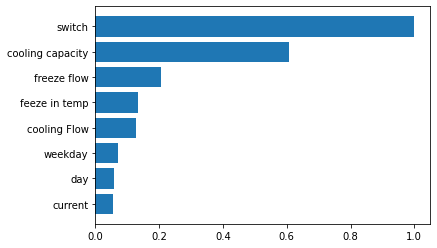

In [37]:
ax = plt.barh(['switch','cooling capacity','freeze flow','feeze in temp','cooling Flow','weekday','day','current'], 
              test2a[0].values)  
plt.gca().invert_yaxis()

In [38]:
chiller2_decomp_day = test2a[1].resample('D').sum()
chiller2_decomp_week = test2a[1].resample('W').sum()

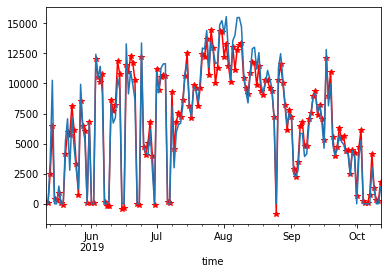

In [40]:
chiller2_decomp_day['Pred'].plot(color='r', marker='*')
chiller2_decomp_day['2#Chiller_power'].plot();

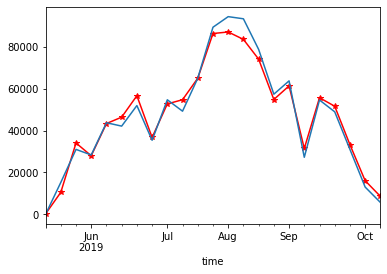

In [41]:
chiller2_decomp_week['Pred'].plot(color='r', marker='*')
chiller2_decomp_week['2#Chiller_power'].plot();

* limited chiller test

In [42]:
chiller2L_decomp_day = test2[1].resample('D').sum()
chiller2L_decomp_week = test2[1].resample('W').sum()

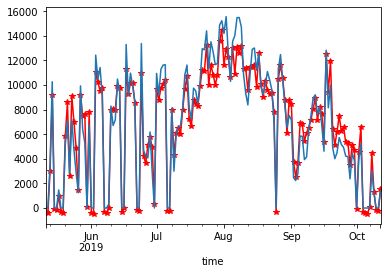

In [43]:
chiller2L_decomp_day['Pred'].plot(color='r', marker='*')
chiller2L_decomp_day['2#Chiller_power'].plot();

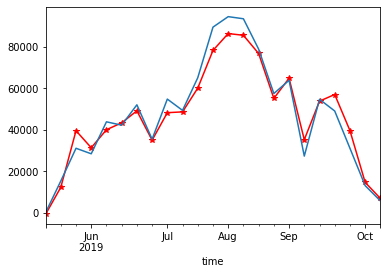

In [44]:
chiller2L_decomp_week['Pred'].plot(color='r', marker='*')
chiller2L_decomp_week['2#Chiller_power'].plot();

## model3

In [45]:
get_stats(df = chiller3, x = indep3, y = '3#Chiller_power' )

                                 OLS Regression Results                                
Dep. Variable:        3#Chiller_power   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              6543.
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:48:30   Log-Likelihood:                         -65936.
No. Observations:               14880   AIC:                                  1.319e+05
Df Residuals:                   14863   BIC:                                  1.320e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [46]:
indep3.remove("humid")
get_stats(df = chiller3, x = indep3, y = '3#Chiller_power' )
get_VIF(indep3, chiller3)

                                 OLS Regression Results                                
Dep. Variable:        3#Chiller_power   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              6952.
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:50:58   Log-Likelihood:                         -65936.
No. Observations:               14880   AIC:                                  1.319e+05
Df Residuals:                   14864   BIC:                                  1.320e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [47]:
indep3.remove("weekday")
get_stats(df = chiller3, x = indep3, y = '3#Chiller_power' )
get_VIF(indep3, chiller3)

                                 OLS Regression Results                                
Dep. Variable:        3#Chiller_power   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              7416.
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:52:01   Log-Likelihood:                         -65936.
No. Observations:               14880   AIC:                                  1.319e+05
Df Residuals:                   14865   BIC:                                  1.320e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [48]:
indep3.remove("Hour")
get_stats(df = chiller3, x = indep3, y = '3#Chiller_power' )
get_VIF(indep3, chiller3)

                                 OLS Regression Results                                
Dep. Variable:        3#Chiller_power   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              7947.
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:52:48   Log-Likelihood:                         -65936.
No. Observations:               14880   AIC:                                  1.319e+05
Df Residuals:                   14866   BIC:                                  1.320e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [49]:
indep3.remove("3#Chiller_cooling_in_temp")
get_stats(df = chiller3, x = indep3, y = '3#Chiller_power' )
get_VIF(indep3, chiller3)

                                 OLS Regression Results                                
Dep. Variable:        3#Chiller_power   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              8558.
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:53:22   Log-Likelihood:                         -65936.
No. Observations:               14880   AIC:                                  1.319e+05
Df Residuals:                   14867   BIC:                                  1.320e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [50]:
indep3.remove("3#Chiller_freeze_in_temp")
get_stats(df = chiller3, x = indep3, y = '3#Chiller_power' )
get_VIF(indep3, chiller3)

                                 OLS Regression Results                                
Dep. Variable:        3#Chiller_power   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              9270.
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:53:58   Log-Likelihood:                         -65937.
No. Observations:               14880   AIC:                                  1.319e+05
Df Residuals:                   14868   BIC:                                  1.320e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [51]:
indep3.remove("Temp")
get_stats(df = chiller3, x = indep3, y = '3#Chiller_power' )
get_VIF(indep3, chiller3)

                                 OLS Regression Results                                
Dep. Variable:        3#Chiller_power   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                          1.011e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:54:38   Log-Likelihood:                         -65939.
No. Observations:               14880   AIC:                                  1.319e+05
Df Residuals:                   14869   BIC:                                  1.320e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [52]:
indep3.remove("3-CH-UA(V)")
get_stats(df = chiller3, x = indep3, y = '3#Chiller_power' )
get_VIF(indep3, chiller3)

                                 OLS Regression Results                                
Dep. Variable:        3#Chiller_power   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                          1.106e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:55:08   Log-Likelihood:                         -65974.
No. Observations:               14880   AIC:                                  1.320e+05
Df Residuals:                   14870   BIC:                                  1.320e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [53]:
indep3.remove("3#Chiller_cooling_out_temp")
get_stats(df = chiller3, x = indep3, y = '3#Chiller_power' )
get_VIF(indep3, chiller3)

                                 OLS Regression Results                                
Dep. Variable:        3#Chiller_power   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                          1.213e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:55:29   Log-Likelihood:                         -66059.
No. Observations:               14880   AIC:                                  1.321e+05
Df Residuals:                   14871   BIC:                                  1.322e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [54]:
indep3.remove("3-CH-F(HZ)")
get_stats(df = chiller3, x = indep3, y = '3#Chiller_power' )
get_VIF(indep3, chiller3)

                                 OLS Regression Results                                
Dep. Variable:        3#Chiller_power   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                          1.364e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:56:01   Log-Likelihood:                         -66065.
No. Observations:               14880   AIC:                                  1.321e+05
Df Residuals:                   14872   BIC:                                  1.322e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [55]:
indep3.remove("Month")
get_stats(df = chiller3, x = indep3, y = '3#Chiller_power' )
get_VIF(indep3, chiller3)

                                 OLS Regression Results                                
Dep. Variable:        3#Chiller_power   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                          1.559e+04
Date:                Mon, 18 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:56:25   Log-Likelihood:                         -66065.
No. Observations:               14880   AIC:                                  1.321e+05
Df Residuals:                   14873   BIC:                                  1.322e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [56]:
test3 = contributions(df = chiller3, x_list = indep3, y = '3#Chiller_power')
test3[0]

3#Chiller_pred                     1.000000
3#chiller_cooling_capacity_pred    0.644578
3#Chiller_freeze_out_temp_pred     0.167094
Day_pred                           0.127544
3#Chiller_freeze_Flow_pred         0.081726
3-CH-IA(A)_pred                    0.039181
3#Chiller_cooling_Flow_pred        0.031653
dtype: float64

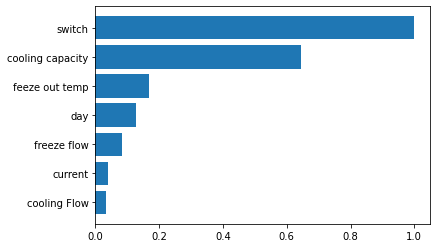

In [57]:
ax = plt.barh(['switch','cooling capacity','feeze out temp','day','freeze flow','current','cooling Flow'
               ], 
              test3[0].values)  
plt.gca().invert_yaxis()

In [58]:
chiller3_decomp_day  = test3[1].resample('D').sum()
chiller3_decomp_week = test3[1].resample('W').sum()

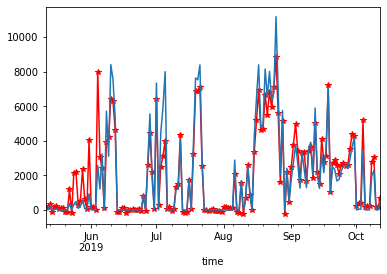

In [59]:
chiller3_decomp_day['Pred'].plot(color='r', marker='*')
chiller3_decomp_day['3#Chiller_power'].plot();

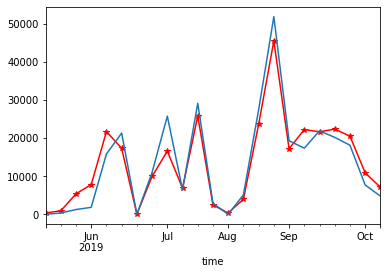

In [60]:
chiller3_decomp_week['Pred'].plot(color='r', marker='*')
chiller3_decomp_week['3#Chiller_power'].plot();